In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Train sets
X_train = pd.read_csv('./Datasets/x_train.csv')
y_train = pd.read_csv('./Datasets/y_train.csv')

# Validation sets
X_valid = pd.read_csv('./Datasets/x_valid.csv')
y_valid = pd.read_csv('./Datasets/y_valid.csv')

# Test sets
X_test = pd.read_csv('./Datasets/x_test.csv')
y_test = pd.read_csv('./Datasets/y_test.csv')

#### Base ExtraTreesClassifier with Performance Metrics

Performance Metric for Extra Trees Classifier on Validation Set
Validation Accuracy: 0.8422388781431335
Precision: 0.6641651031894934
Recall: 0.42779456193353477
F1 Score: 0.5203969128996693
AUC: 0.8353479342552166


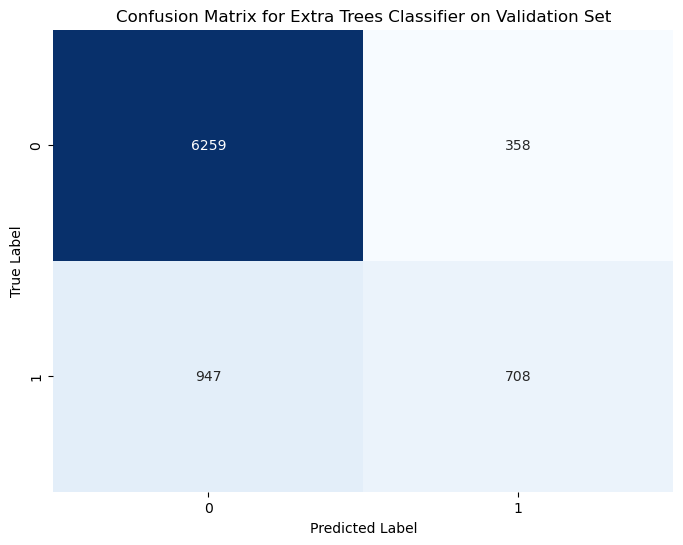

-----------------------------------------------------------------
Performance Metric for Extra Trees Classifier on Testing Set
Validation Accuracy: 0.8416344294003868
Precision: 0.6631878557874763
Recall: 0.4226118500604595
F1 Score: 0.5162481536189069
AUC: 0.6844851332502357


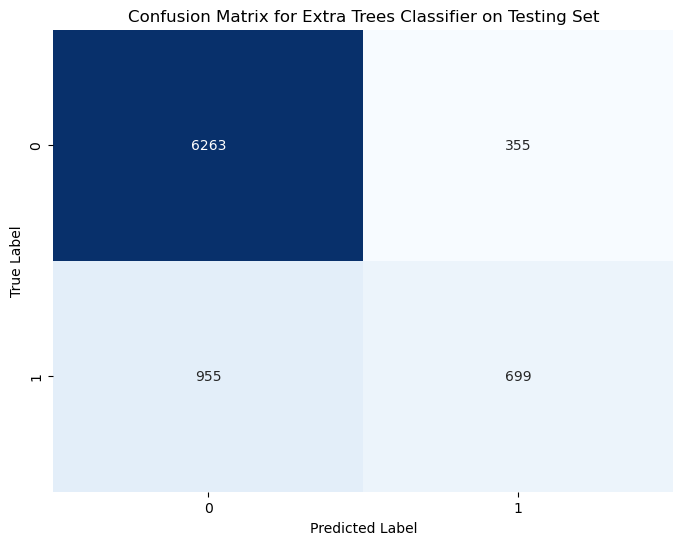

In [ ]:
model = 'Extra Trees Classifier'

# Create an ExtraTreesClassifier 
extra_trees_classifier = ExtraTreesClassi#### Parameters of Base ExtraTreesClassifier fier(random_state=0)
extra_trees_classifier.fit(X_train, y_train)

# Predictions for model on validation & testing set
y_valid_pred = extra_trees_classifier.predict(X_valid)
y_test_pred = extra_trees_classifier.predict(X_test)

# Performance metrics on Validation Set
set_type = 'Validation'
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)
y_valid_prob = extra_trees_classifier.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_valid_prob)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")  
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=extra_trees_classifier.classes_, yticklabels=extra_trees_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("-----------------------------------------------------------------")

# Performance metrics on Testing Set
set_type = 'Testing'
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
y_test_prob = extra_trees_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test_pred)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}") 
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=extra_trees_classifier.classes_, yticklabels=extra_trees_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Parameters of Base ExtraTreesClassifier 

In [ ]:
extra_trees_classifier.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter Tuning for ExtraTreesClassifier Model with Performance Metrics 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 15, 'bootstrap': True}
Performance Metric for Extra Trees Classifier on Validation Set
Validation Accuracy: 0.8467117988394585
Precision: 0.7021943573667712
Recall: 0.4060422960725076
F1 Score: 0.5145482388973968
AUC: 0.8526528528778067


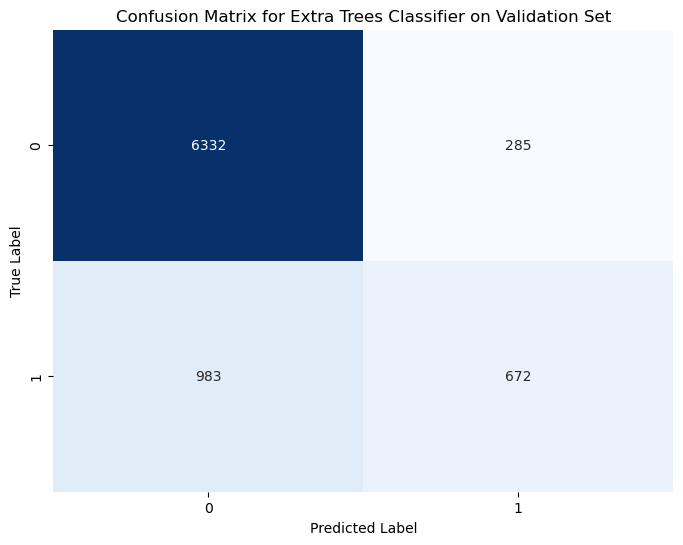

-----------------------------------------------------------------
Performance Metric for Extra Trees Classifier on Testing Set
Validation Accuracy: 0.8511847195357833
Precision: 0.7125628140703517
Recall: 0.4286577992744861
F1 Score: 0.5352963382408457
AUC: 0.6927211631609661


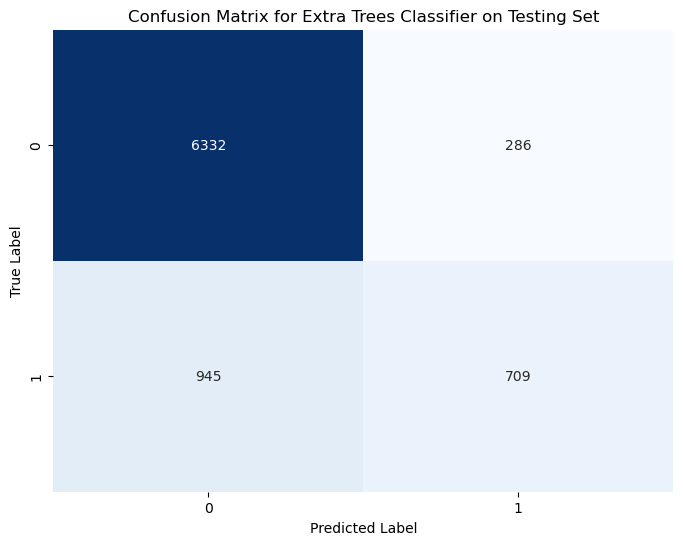

In [ ]:
# Create an Random Forest Classifier
extra_trees_classifier = ExtraTreesClassifier(random_state=0)

# Hyperparameter grid to search
param_dist = {
    'n_estimators': [50, 100, 200],           # Number of trees
    'max_depth': [3, 5, 7, 10, 15],             # Maximum depth of the trees (discrete values)
    'min_samples_split': [2, 5, 10, 15, 20],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 5, 10, 15, 20],     # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
    'bootstrap': [True, False],                  # Whether bootstrap samples are used
}
# Random Search
random_search = RandomizedSearchCV(
    estimator=extra_trees_classifier,
    param_distributions=param_dist,
    n_iter=50,            # Number of random combinations to try
    scoring='f1',    # Use an appropriate metric for your problem
    cv=5,                 # 5-fold cross-validation
    verbose=2,
    n_jobs=-1             # Use all available CPU cores
)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best Model after RandomSearch
best_extra_trees_classifier = random_search.best_estimator_
best_extra_trees_classifier.fit(X_train, y_train)

# Predictions for model on validation & testing set
y_valid_pred = best_extra_trees_classifier.predict(X_valid)
y_test_pred = best_extra_trees_classifier.predict(X_test)

# Performance metrics on Validation Set
set_type = 'Validation'
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)
y_valid_prob = best_extra_trees_classifier.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_valid_prob)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")  
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=best_extra_trees_classifier.classes_, yticklabels=best_extra_trees_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("-----------------------------------------------------------------")

# Performance metrics on Testing Set
set_type = 'Testing'
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
y_test_prob = best_extra_trees_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test_pred)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}") 
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=best_extra_trees_classifier.classes_, yticklabels=best_extra_trees_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Parameters of Tuned ExtraTreesClassifier

In [ ]:
best_extra_trees_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}